# Decription - BMWW is to update the model

#### Approach: In this scenario, i have divided my .csv file into 5 different subsets. One of them i have reserved for validation. I have created different functions to preprocess the data and perform EDA after every file that is read


#### I would be training on one subset of the dataset using random forest and used different hyper paramters to judge the accuarcy of the model, with the least MSE i have progressed with those particular parameters.

#### After retraining on every subset of the file, i performed testing on the unforeseen data to check the MSE and i concluded that after every retraining of the model, the accuracy to predict the better results on unforeseen has increased 

In [128]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
#import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.preprocessing import LabelEncoder
import warnings
warnings.filterwarnings("ignore")

In [129]:
names=['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type', 'Item_Outlet_Sales']


In [130]:
def read_files(x):   #to read the csv files
    df = pd.read_csv(x,names=names)
    
    
    return df

In [131]:
def walkthrough(df):   #function to display the general information of the current file
    print("Shape of the current file : ", df.shape,"\n")  
    print("describe function : \n",df.describe(),"\n")  
    uniqueValues = df.nunique(dropna=True)
    print("unique values in each feature : \n",uniqueValues) 

In [132]:
def null_visual(df):
    
    #visualizing the null values count

    missing_data=df.isnull().sum()
    missing_data[missing_data>0].\
    sort_values(ascending=True).\
    plot(kind='barh',figsize=(10,4))
    plt.title('missing value')
    plt.show()  
    missing_data=missing_data[missing_data>0]
    print(missing_data)

In [133]:
def cat_num(df):
    #lets create a list of categorical feature.
    numeric_data=df.select_dtypes(include = [np.number])
    cat_data=df.select_dtypes(exclude = [np.number])

    print('there are {0} numerical and {1} categorical columns'.\
    format(numeric_data.shape[1],cat_data.shape[1]))
    
    return numeric_data,cat_data

In [134]:
def cat_analysis(df):
    
    for col in df:
        print(col)
        print(df[col].value_counts())
        print()


In [135]:
def na_fill(df):
    #two attributes have missing na, one is numeric, other one is cat
    #filling na with identifier mean 
    df['Item_Weight']=df.groupby('Item_Identifier')['Item_Weight'].apply(lambda x:x.fillna(x.mean()))
    df['Item_Weight'].fillna(0,inplace=True)      #to fill remaining nan values, missed by grouping
    df['Item_Weight'].isnull().sum()
    
    #categorical with mode
    df['Outlet_Size']=df.groupby('Outlet_Type')['Outlet_Size'].apply(lambda x:x.fillna(x.mode()[0]))
    df['Outlet_Size'].isnull().sum()
    
    
    #replacing 0 with mean
    df['Item_Visibility'].replace(0, df['Item_Visibility'].mean(), inplace=True)
    
    return df

In [136]:
def feature_eng(df):
    
    # "Item_Fat_Content" has similar values with different names so combining them here

    df["Item_Fat_Content"].replace({'LF':'Low Fat', 'reg':'Regular', 'low fat':'Low Fat'}, inplace=True)
    print("after combining similar fat content \n",df["Item_Fat_Content"].value_counts())
    
    
    
    #new feature to store the item type => either food, drink or non consumable
    df['Item_Cat'] = df['Item_Identifier'].apply(lambda x: x[0:2])
    print("\n\nnew variable item_cat value counts \n", df['Item_Cat'].value_counts())
    return df

In [137]:
def feature_eng2(df):
    #here i am making new category in item fat content, if the item cat == Non consumable then the corresponding
    #fat content will be non edible

    df.loc[df['Item_Cat']=='NC', 'Item_Fat_Content'] = 'Non-Edible'
    
    
    # as outlet establishment year has a large number => impactful on machine training so reducing it
    #2013 is the year of dataset

    df['Outlet_Years'] = 2013 - df['Outlet_Establishment_Year']
    
    return df

In [138]:
def EDA_1(df):
    #checking distribution of numeric data
    df['Item_Weight'].hist()

def EDA_2(df):
    df['Item_Visibility'].hist(color="red")
    
    
def EDA_3(df):
     sns.distplot(df['Item_MRP']) 
        
def EDA_4(df):
    sns.distplot(df['Item_Outlet_Sales'])    
    
def EDA_5(df):
    sns.countplot(df["Item_Fat_Content"])            #the distribution is not biased 
    
def EDA_6(df):
    data=sns.countplot(df["Item_Type"])
    data.set_xticklabels(data.get_xticklabels(), rotation=90)
    
    
def EDA_7(df):
    #checking the correlation among features.
    corr = df.corr()
    print(sns.heatmap(corr, annot=True))


In [139]:
def label_encod(df):
    from sklearn.preprocessing import LabelEncoder
    le = LabelEncoder()

    new_df=df  #creating new df for storing the encoded variables

    new_df.drop(columns=['Outlet_Establishment_Year', 'Item_Identifier', 'Outlet_Identifier'], inplace=True)

    new_df['Item_Type'] = le.fit_transform(new_df['Item_Type'])
    
    new_df = pd.get_dummies(new_df, columns=['Item_Fat_Content', 'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type', 'Item_Cat'])
   
    return new_df

## Reading the dataframe

### dataset file 1

In [140]:
x='bigmartsalesprediction_0.csv'
df0=pd.read_csv(x)
df0.head()       #to read the files

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


## General information regarding the file

In [141]:
walkthrough(df0)  #general information of the dataset


Shape of the current file :  (2000, 12) 

describe function : 
        Item_Weight  Item_Visibility     Item_MRP  Outlet_Establishment_Year  \
count  1648.000000      2000.000000  2000.000000                2000.000000   
mean     13.005434         0.066901   140.710172                1997.680000   
std       4.615655         0.051923    62.499948                   8.386463   
min       4.590000         0.000000    31.290000                1985.000000   
25%       8.930000         0.026982    92.818600                1987.000000   
50%      13.000000         0.056541   143.315400                1999.000000   
75%      16.887500         0.094695   185.099000                2004.000000   
max      21.350000         0.328391   265.222600                2009.000000   

       Item_Outlet_Sales  
count        2000.000000  
mean         2217.211207  
std          1756.097968  
min            33.290000  
25%           847.729850  
50%          1785.342700  
75%          3102.461550  
max     

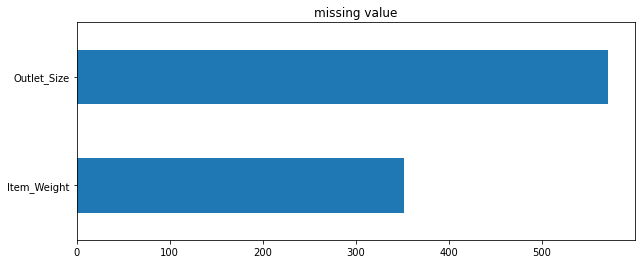

Item_Weight    352
Outlet_Size    571
dtype: int64


In [142]:
null_visual(df0)  #to visualize the null values in the dataset

In [143]:
numeric_data,cat_data=cat_num(df0)   #to check on numeric and categorical features of the dataset
cat_analysis(cat_data)              #to find the value counts of each categorical feature

there are 5 numerical and 7 categorical columns
Item_Identifier
FDJ55    6
FDQ56    6
FDW49    6
FDR43    6
FDZ33    5
        ..
FDC56    1
FDR19    1
FDF57    1
NCC43    1
FDS47    1
Name: Item_Identifier, Length: 1152, dtype: int64

Item_Fat_Content
Low Fat    1217
Regular     657
LF           67
reg          30
low fat      29
Name: Item_Fat_Content, dtype: int64

Item_Type
Fruits and Vegetables    310
Snack Foods              293
Household                216
Frozen Foods             206
Dairy                    166
Canned                   145
Baking Goods             132
Soft Drinks              109
Health and Hygiene       103
Meat                     100
Breads                    51
Hard Drinks               47
Others                    43
Starchy Foods             36
Breakfast                 28
Seafood                   15
Name: Item_Type, dtype: int64

Outlet_Identifier
OUT045    235
OUT027    227
OUT013    225
OUT046    223
OUT035    220
OUT017    215
OUT049    206
OUT018  

## Missing value replacement & feature engineering

In [144]:
#two attributes have missing na, one is numeric, other one is cat
#filling na with identifier mean 

df0=na_fill(df0)

In [145]:
df0=feature_eng(df0)
df0=feature_eng2(df0)

df0.shape   #2 new features are created

after combining similar fat content 
 Low Fat    1313
Regular     687
Name: Item_Fat_Content, dtype: int64


new variable item_cat value counts 
 FD    1447
NC     362
DR     191
Name: Item_Cat, dtype: int64


(2000, 14)

## Exploratory Data Analysis

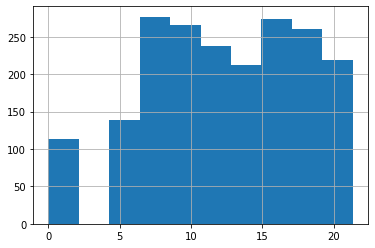

In [146]:
EDA_1(df0)
#Item_Weight analysis

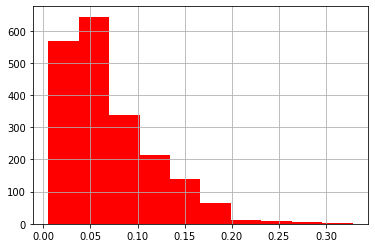

In [147]:
EDA_2(df0)  # Item_Visibility analysis
#=>left skewed =>log transformation

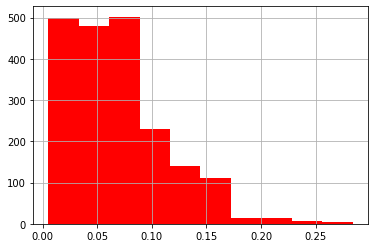

In [148]:
# log transformation
df0['Item_Visibility'] = np.log(1+df0['Item_Visibility'])
df0['Item_Visibility'].hist(color="red")             # somewhat a better distribution

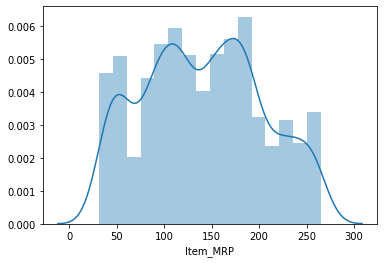

In [149]:
#Item_MRP analysis
EDA_3(df0)   #4 distinguised categories can be seen here

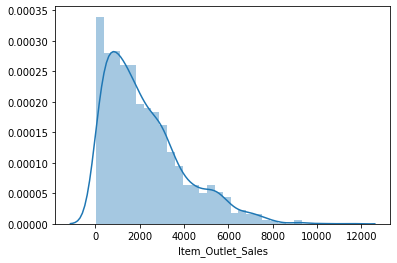

In [150]:
#Item_Outlet_Sales analysis

EDA_4(df0)   #left skewed =>normalization using log transformation

In [151]:
df0['Item_Outlet_Sales'] = np.log(1+df0['Item_Outlet_Sales'])

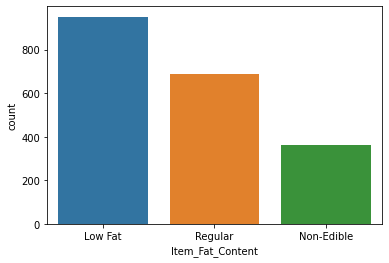

In [152]:
#Item_Fat_Content analysis
EDA_5(df0)    #the distribution is not biased 

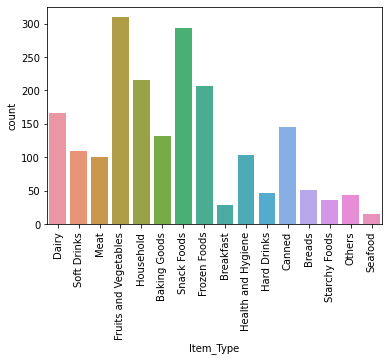

In [153]:
 #Item_Type analysis
    
EDA_6(df0)

AxesSubplot(0.125,0.125;0.62x0.755)


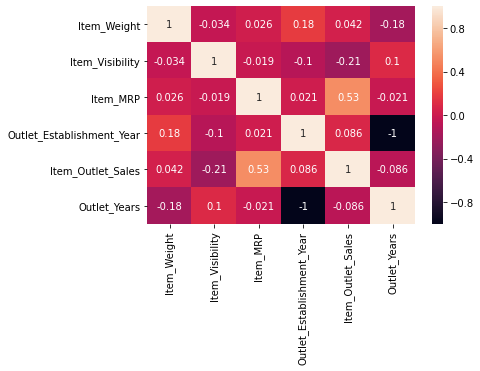

In [154]:
EDA_7(df0)


#highly negative corr can be seen( need to remove one of them as they are derived from existing)
#it can be seen that sales shows some correlation with item marp

## label encoding

In [155]:
df0_new=label_encod(df0)

In [156]:
df0_new.head()

,Item_Weight,Item_Visibility,Item_Type,Item_MRP,Item_Outlet_Sales,Outlet_Years,Item_Fat_Content_Low Fat,Item_Fat_Content_Non-Edible,Item_Fat_Content_Regular,Outlet_Size_High,...,Outlet_Location_Type_Tier 1,Outlet_Location_Type_Tier 2,Outlet_Location_Type_Tier 3,Outlet_Type_Grocery Store,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3,Item_Cat_DR,Item_Cat_FD,Item_Cat_NC
0,9.30,0.015920,4,249.8092,8.225808,14,1,0,0,0,...,1,0,0,0,1,0,0,0,1,0
1,5.92,0.019095,14,48.2692,6.096776,4,0,0,1,0,...,0,0,1,0,0,1,0,1,0,0
2,17.50,0.016621,10,141.6180,7.648868,14,1,0,0,0,...,1,0,0,0,1,0,0,0,1,0
3,19.20,0.064758,6,182.0950,6.597664,15,0,0,1,0,...,0,0,1,1,0,0,0,0,1,0
4,8.93,0.064758,9,53.8614,6.903451,26,0,1,0,1,...,0,0,1,0,1,0,0,0,0,1


## Model training on file 1

In [157]:
from sklearn.model_selection import train_test_split

#X_0 indicates X(independent features) and 0 (0th file)

X_0= df0_new
X_0=X_0.drop(columns=['Item_Outlet_Sales'],axis=1)
Y_0=df0_new['Item_Outlet_Sales']

In [158]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error


def train(model, X, y):
    model.fit(X, y)
    
    # perform cross-validation
    cross_val_score(model, X, y, cv=5)

In [159]:
from sklearn.ensemble import RandomForestRegressor

# Instantiate model # criterion = 'mse' as the problem is regression 

#model = RandomForestRegressor(n_estimators = 500, criterion = 'mse', max_depth = 5, random_state=192)  #=> mse = 0.25

#model = RandomForestRegressor(n_estimators = 100, criterion = 'mse', max_depth = None, random_state=42)  # => mse = 0.044

model = RandomForestRegressor(n_estimators = 500, criterion = 'mse', max_depth = None, random_state=42)  #=> mse = 0.043

train(model, X_0, Y_0)

# predict the training set
pred = model.predict(X_0)
    
print("Model Report")
print("MSE:",mean_squared_error(Y_0,pred)) 

Model Report
MSE: 0.04310063098424958


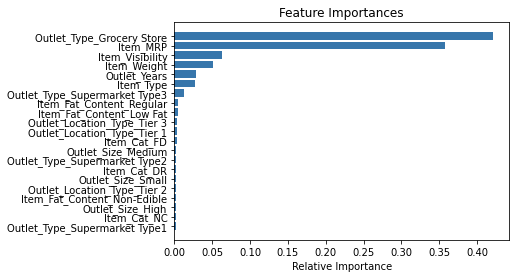

In [161]:
importances = model.feature_importances_

features=X_0.columns
indices = np.argsort(importances)
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='#3776ab', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

In [162]:
#training with important features only

X_01=X_0[['Outlet_Type_Grocery Store', 'Item_MRP', 'Item_Visibility','Item_Type','Outlet_Years','Item_Weight' ]]

In [181]:
train(model, X_01, Y_0)  #accuracy is almost the same, to make it generalized(avoid overfiiting) i will be progressing
                         #with this.
    
pred = model.predict(X_01)
    
print("Model Report")
print("MSE:",mean_squared_error(Y_0,pred))     

Model Report
MSE: 0.04331891054919498


In [182]:
import pickle

# save the model to disk
filename_1 = 'model_1.sav'
pickle.dump(model, open(filename_1, 'wb'))

### i have taken 1 (rows=500) file dataset as validation dataset, so checking the accuracy on the unforeseen data after each retraining 


In [36]:
#dataset validation

x='bigmartsalesprediction_4.csv'
df_train=read_files(x)
df_train.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDR59,14.50,Regular,0.063810,Breads,263.2594,OUT013,1987,High,Tier 3,Supermarket Type1,2878.2534
1,FDS55,7.02,Low Fat,0.081329,Fruits and Vegetables,150.0734,OUT045,2002,NaN,Tier 2,Supermarket Type1,4454.2020
2,FDT21,7.42,Low Fat,0.020388,Snack Foods,247.1092,OUT035,2004,Small,Tier 2,Supermarket Type1,4233.1564
3,NCR38,17.25,Low Fat,0.113518,Household,253.5724,OUT046,1997,Small,Tier 1,Supermarket Type1,5033.4480
4,FDJ22,18.75,Low Fat,0.052917,Snack Foods,190.6504,OUT045,2002,NaN,Tier 2,Supermarket Type1,1342.2528


In [37]:
walkthrough(df_train)

Shape of the current file :  (524, 12) 

describe function : 
        Item_Weight  Item_Visibility   Item_MRP  Outlet_Establishment_Year  \
count   436.000000       524.000000  524.00000                 524.000000   
mean     12.609622         0.062216  141.65570                1998.545802   
std       4.544865         0.049397   62.67918                   8.363389   
min       5.030000         0.000000   32.09000                1985.000000   
25%       8.395000         0.026238   97.16275                1987.000000   
50%      12.300000         0.049182  144.76280                1999.000000   
75%      16.350000         0.089920  185.19370                2004.000000   
max      21.250000         0.299098  266.02260                2009.000000   

       Item_Outlet_Sales  
count         524.000000  
mean         2155.621525  
std          1624.096742  
min            38.616400  
25%           772.161550  
50%          1870.898000  
75%          3147.569500  
max          9390.443200   

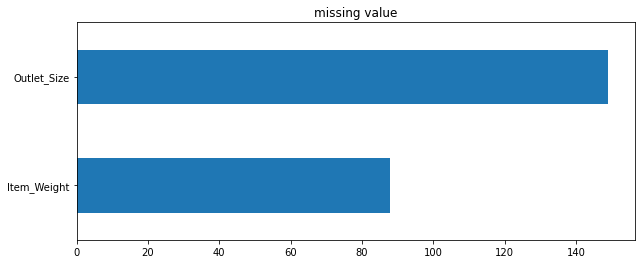

Item_Weight     88
Outlet_Size    149
dtype: int64


In [38]:
null_visual(df_train)

In [39]:
numeric_data,cat_data=cat_num(df_train)   #to check on numeric and categorical features of the dataset
cat_analysis(cat_data)              #to find the value counts of each categorical feature

there are 5 numerical and 7 categorical columns
Item_Identifier
FDQ58    3
FDV48    3
FDL10    3
FDR59    2
FDE34    2
        ..
FDO37    1
FDW60    1
FDG16    1
FDW26    1
FDL13    1
Name: Item_Identifier, Length: 457, dtype: int64

Item_Fat_Content
Low Fat    327
Regular    169
LF          18
reg          6
low fat      4
Name: Item_Fat_Content, dtype: int64

Item_Type
Fruits and Vegetables    77
Snack Foods              76
Household                58
Frozen Foods             52
Canned                   42
Health and Hygiene       37
Dairy                    36
Baking Goods             35
Soft Drinks              29
Meat                     27
Hard Drinks              14
Others                   11
Breads                    9
Starchy Foods             9
Seafood                   6
Breakfast                 6
Name: Item_Type, dtype: int64

Outlet_Identifier
OUT018    68
OUT035    63
OUT017    62
OUT049    57
OUT045    57
OUT027    56
OUT046    55
OUT013    44
OUT019    32
OUT010    3

In [40]:
#two attributes have missing na, one is numeric, other one is cat
#filling na with identifier mean 

df_train=na_fill(df_train)

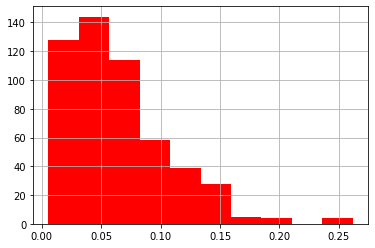

In [41]:
df_train['Item_Visibility'] = np.log(1+df_train['Item_Visibility'])
df_train['Item_Visibility'].hist(color="red") 

In [42]:
df_train['Item_Outlet_Sales'] = np.log(1+df_train['Item_Outlet_Sales'])

In [43]:
df_train=feature_eng(df_train)
df_train=feature_eng2(df_train)

df_train.shape   #2 new features are created

after combining similar fat content 
 Low Fat    349
Regular    175
Name: Item_Fat_Content, dtype: int64


new variable item_cat value counts 
 FD    370
NC    106
DR     48
Name: Item_Cat, dtype: int64


(524, 14)

In [44]:
df_train.shape

(524, 14)

In [45]:
df_train_new=label_encod(df_train)

In [46]:
df_train_new.head(n=3)

,Item_Weight,Item_Visibility,Item_Type,Item_MRP,Item_Outlet_Sales,Outlet_Years,Item_Fat_Content_Low Fat,Item_Fat_Content_Non-Edible,Item_Fat_Content_Regular,Outlet_Size_High,...,Outlet_Location_Type_Tier 1,Outlet_Location_Type_Tier 2,Outlet_Location_Type_Tier 3,Outlet_Type_Grocery Store,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3,Item_Cat_DR,Item_Cat_FD,Item_Cat_NC
0,14.50,0.061857,1,263.2594,7.965286,26,0,0,1,1,...,0,0,1,0,1,0,0,0,1,0
1,7.02,0.078191,6,150.0734,8.401828,11,1,0,0,0,...,0,1,0,0,1,0,0,0,1,0
2,7.42,0.020183,13,247.1092,8.350939,9,1,0,0,0,...,0,1,0,0,1,0,0,0,1,0


In [47]:
df_train_X=df_train_new[['Outlet_Type_Grocery Store', 'Item_MRP', 'Item_Visibility','Item_Type','Outlet_Years','Item_Weight' ]]
df_train_Y= df_train_new['Item_Outlet_Sales']

### predicting on unforeseen

In [199]:
#predicting on unforeseen

loaded_model_1 = pickle.load(open(filename_1, 'rb'))
pred = loaded_model_1.predict(df_train_X)

phase_1 = mean_squared_error(df_train_Y,pred)
phase_1
#predicting by model version 1


0.33001073021282434

### dataset file 2 and its preprocessing

In [55]:
#dataset 2   =>file2

x='bigmartsalesprediction_1.csv'
df1=read_files(x)
df1.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDZ21,17.600,Regular,0.039222,Snack Foods,97.2410,OUT046,1997,Small,Tier 1,Supermarket Type1,193.0820
1,FDJ50,8.645,Low Fat,0.021582,Canned,53.3982,OUT035,2004,Small,Tier 2,Supermarket Type1,1209.7586
2,FDV35,19.500,Low Fat,0.128206,Breads,155.9314,OUT046,1997,Small,Tier 1,Supermarket Type1,3878.2850
3,FDW56,7.680,Low Fat,0.071301,Fruits and Vegetables,190.8162,OUT017,2007,NaN,Tier 2,Supermarket Type1,2693.8268
4,DRL35,15.700,Low Fat,0.030766,Hard Drinks,43.2770,OUT045,2002,NaN,Tier 2,Supermarket Type1,649.1550


In [56]:
walkthrough(df1)  #general information of the dataset

Shape of the current file :  (2001, 12) 

describe function : 
        Item_Weight  Item_Visibility     Item_MRP  Outlet_Establishment_Year  \
count  1700.000000      2001.000000  2001.000000                2001.000000   
mean     12.870544         0.064789   140.961209                1998.130935   
std       4.675504         0.050763    62.634736                   8.181922   
min       4.555000         0.000000    31.890000                1985.000000   
25%       8.778750         0.026940    93.846200                1987.000000   
50%      12.600000         0.052312   142.015400                1999.000000   
75%      17.100000         0.092576   188.753000                2004.000000   
max      21.350000         0.325781   266.188400                2009.000000   

       Item_Outlet_Sales  
count        2001.000000  
mean         2154.207379  
std          1660.771545  
min            33.955800  
25%           810.944400  
50%          1780.349200  
75%          3075.996000  
max     

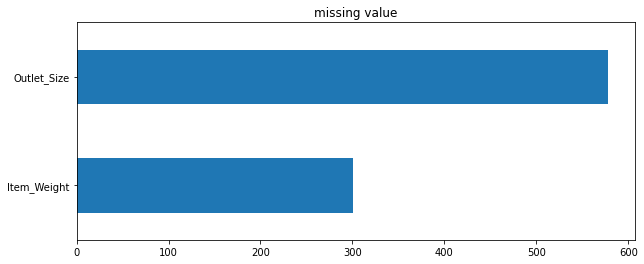

Item_Weight    301
Outlet_Size    578
dtype: int64


In [57]:
null_visual(df1)  #to visualize the null values in the dataset

In [58]:
numeric_data,cat_data=cat_num(df1)   #to check on numeric and categorical features of the dataset
cat_analysis(cat_data)              #to find the value counts of each categorical feature

there are 5 numerical and 7 categorical columns
Item_Identifier
FDQ40    6
NCC07    5
FDY47    5
FDH10    5
NCV41    5
        ..
NCL19    1
FDV15    1
NCQ38    1
FDP52    1
FDS47    1
Name: Item_Identifier, Length: 1162, dtype: int64

Item_Fat_Content
Low Fat    1196
Regular     682
LF           77
reg          28
low fat      18
Name: Item_Fat_Content, dtype: int64

Item_Type
Fruits and Vegetables    283
Snack Foods              269
Frozen Foods             212
Household                211
Baking Goods             167
Canned                   163
Dairy                    153
Health and Hygiene       114
Soft Drinks              109
Meat                     100
Breads                    62
Hard Drinks               52
Others                    35
Starchy Foods             33
Breakfast                 24
Seafood                   14
Name: Item_Type, dtype: int64

Outlet_Identifier
OUT035    229
OUT049    229
OUT046    226
OUT013    222
OUT045    221
OUT017    220
OUT018    216
OUT027  

In [59]:
#two attributes have missing na, one is numeric, other one is cat
#filling na with identifier mean 

df1=na_fill(df1)

### dataset file 2 feature engineering & EDA

In [60]:
df1=feature_eng(df1)
df1=feature_eng2(df1)

df1.shape   #2 new features are created

after combining similar fat content 
 Low Fat    1291
Regular     710
Name: Item_Fat_Content, dtype: int64


new variable item_cat value counts 
 FD    1447
NC     360
DR     194
Name: Item_Cat, dtype: int64


(2001, 14)

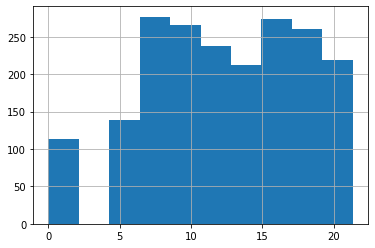

In [61]:
EDA_1(df0)
#Item_Weight analysis

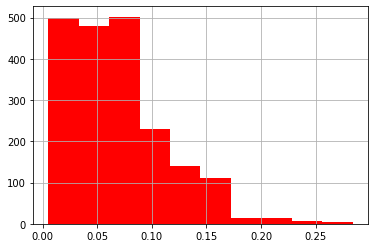

In [62]:
EDA_2(df0)  # Item_Visibility analysis
#=>left skewed =>log transformation

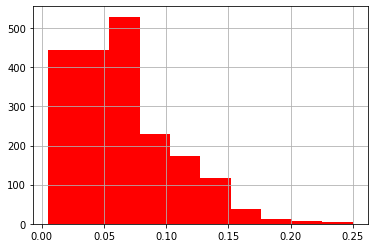

In [63]:
# log transformation
df0['Item_Visibility'] = np.log(1+df0['Item_Visibility'])
df0['Item_Visibility'].hist(color="red")             # somewhat a better distribution

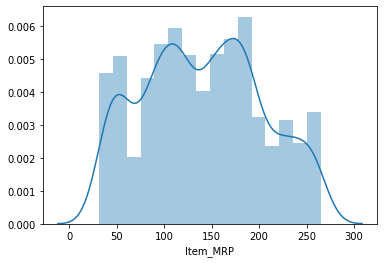

In [64]:
#Item_MRP analysis
EDA_3(df0)   #4 distinguised categories can be seen here

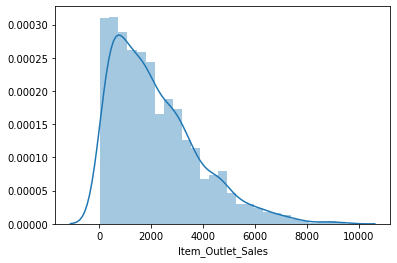

In [65]:
#Item_Outlet_Sales analysis

EDA_4(df1)   #left skewed =>normalization using log transformation

In [66]:
df1['Item_Outlet_Sales'] = np.log(1+df1['Item_Outlet_Sales'])

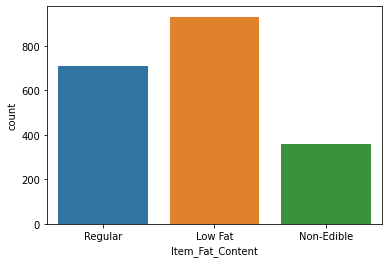

In [67]:
#Item_Fat_Content analysis
EDA_5(df1)    #the distribution is not biased 

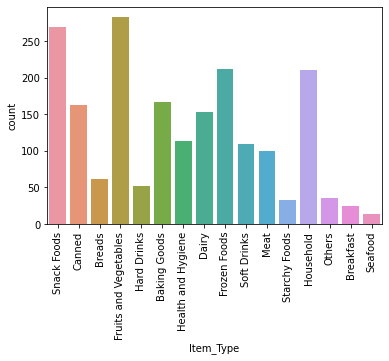

In [68]:
#Item_Type analysis
    
EDA_6(df1)

In [69]:
df1_new=label_encod(df1)

In [70]:
df1_new.head(n=3)

,Item_Weight,Item_Visibility,Item_Type,Item_MRP,Item_Outlet_Sales,Outlet_Years,Item_Fat_Content_Low Fat,Item_Fat_Content_Non-Edible,Item_Fat_Content_Regular,Outlet_Size_High,...,Outlet_Location_Type_Tier 1,Outlet_Location_Type_Tier 2,Outlet_Location_Type_Tier 3,Outlet_Type_Grocery Store,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3,Item_Cat_DR,Item_Cat_FD,Item_Cat_NC
0,17.600,0.039222,13,97.2410,5.268281,16,0,0,1,0,...,1,0,0,0,1,0,0,0,1,0
1,8.645,0.021582,3,53.3982,7.099002,9,1,0,0,0,...,0,1,0,0,1,0,0,0,1,0
2,19.500,0.128206,1,155.9314,8.263406,16,1,0,0,0,...,1,0,0,0,1,0,0,0,1,0


In [71]:
X_1= df1_new
X_1=X_1.drop(columns=['Item_Outlet_Sales'],axis=1)
Y_1=df1_new['Item_Outlet_Sales']

In [72]:
X_11=X_1[['Outlet_Type_Grocery Store', 'Item_MRP', 'Item_Visibility','Item_Type','Outlet_Years','Item_Weight' ]]
pred = model.predict(X_11)
    
print("Model Report")
print("MSE:",mean_squared_error(Y_1,pred))     #here the model is not trained on unforeseen so the error is 0.31

Model Report
MSE: 0.3129045432459298


## Model retraining using dataset file 2

In [184]:
train(model, X_11, Y_1)  #accuracy is almost the same, to make it generalized(avoid overfiiting) i will be progressing
                         #with this.
    
pred = model.predict(X_11)
    
print("Model Report")
print("MSE:",mean_squared_error(Y_1,pred))     #now the huge difference is seen on accuracy as the model is retrained
                                               #on new file

Model Report
MSE: 0.04292750725737745


In [185]:

# save the model to disk
filename_2 = 'model_2.sav'
pickle.dump(model, open(filename_2, 'wb'))

### checking the updated model on unforeseen

In [198]:
#predicting on unforeseen

loaded_model_2 = pickle.load(open(filename_2, 'rb'))
pred = loaded_model_2.predict(df_train_X)

phase_2= mean_squared_error(df_train_Y,pred)
phase_2
#predicting by model version 2

0.31603564355673247

## dataset file 3 reading and walking through

In [82]:
#dataset file 3

x='bigmartsalesprediction_2.csv'
df_2=read_files(x)
df_2.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDI20,19.100,Low Fat,0.038721,Fruits and Vegetables,210.8586,OUT018,2009,Medium,Tier 3,Supermarket Type2,6331.7580
1,FDH33,12.850,Low Fat,0.122414,Snack Foods,42.9428,OUT017,2007,NaN,Tier 2,Supermarket Type1,703.0848
2,NCO29,11.150,Low Fat,0.032322,Health and Hygiene,165.6526,OUT045,2002,NaN,Tier 2,Supermarket Type1,1315.6208
3,FDK22,9.800,Low Fat,0.026139,Snack Foods,216.7850,OUT045,2002,NaN,Tier 2,Supermarket Type1,1947.4650
4,DRO47,10.195,Low Fat,0.000000,Hard Drinks,114.0860,OUT046,1997,Small,Tier 1,Supermarket Type1,1810.9760


In [83]:
walkthrough(df_2)

Shape of the current file :  (2001, 12) 

describe function : 
        Item_Weight  Item_Visibility     Item_MRP  Outlet_Establishment_Year  \
count  1648.000000      2001.000000  2001.000000                2001.000000   
mean     13.002888         0.067284   142.025776                1997.715142   
std       4.687110         0.051756    62.506220                   8.428987   
min       4.555000         0.000000    32.055800                1985.000000   
25%       8.895000         0.027324    95.075200                1987.000000   
50%      12.850000         0.056031   143.781200                1999.000000   
75%      17.250000         0.097368   185.755600                2004.000000   
max      21.350000         0.308145   266.888400                2009.000000   

       Item_Outlet_Sales  
count        2001.000000  
mean         2196.656538  
std          1689.366579  
min            36.619000  
25%           885.514000  
50%          1837.608000  
75%          3131.923200  
max     

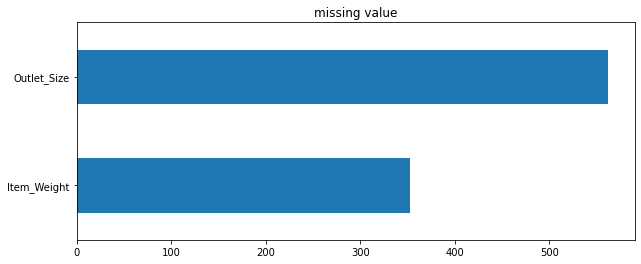

Item_Weight    353
Outlet_Size    562
dtype: int64


In [84]:
null_visual(df_2)

In [85]:
numeric_data,cat_data=cat_num(df_2)   #to check on numeric and categorical features of the dataset
cat_analysis(cat_data)              #to find the value counts of each categorical feature

there are 5 numerical and 7 categorical columns
Item_Identifier
FDH56    6
DRD12    6
NCS29    5
NCH55    5
NCQ43    5
        ..
NCP06    1
FDB29    1
FDR25    1
DRG01    1
DRC24    1
Name: Item_Identifier, Length: 1177, dtype: int64

Item_Fat_Content
Low Fat    1183
Regular     692
LF           76
low fat      27
reg          23
Name: Item_Fat_Content, dtype: int64

Item_Type
Fruits and Vegetables    283
Snack Foods              279
Household                216
Frozen Foods             203
Dairy                    168
Baking Goods             155
Canned                   147
Health and Hygiene       125
Meat                      94
Soft Drinks               93
Breads                    69
Hard Drinks               51
Starchy Foods             39
Others                    39
Breakfast                 23
Seafood                   17
Name: Item_Type, dtype: int64

Outlet_Identifier
OUT027    234
OUT013    225
OUT035    222
OUT045    221
OUT018    219
OUT046    216
OUT017    209
OUT049  

In [86]:
#two attributes have missing na, one is numeric, other one is cat
#filling na with identifier mean 

df_2=na_fill(df_2)

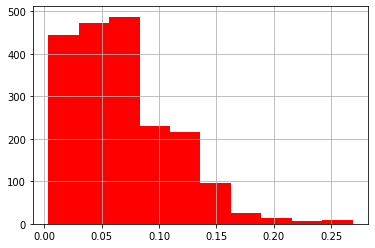

In [87]:
df_2['Item_Visibility'] = np.log(1+df_2['Item_Visibility'])
df_2['Item_Visibility'].hist(color="red") 

In [90]:
df_2['Item_Outlet_Sales'] = np.log(1+df_2['Item_Outlet_Sales'])

### Feature Engineering and EDA

In [91]:
df_2=feature_eng(df_2)
df_2=feature_eng2(df_2)

df_2.shape   #2 new features are created

after combining similar fat content 
 Low Fat    1286
Regular     715
Name: Item_Fat_Content, dtype: int64


new variable item_cat value counts 
 FD    1443
NC     380
DR     178
Name: Item_Cat, dtype: int64


(2001, 14)

In [92]:
df_2_new=label_encod(df_2)
df_2_new.shape

(2001, 22)

In [93]:
df_2_X=df_2_new[['Outlet_Type_Grocery Store', 'Item_MRP', 'Item_Visibility','Item_Type','Outlet_Years','Item_Weight' ]]
df_2_Y= df_2_new['Item_Outlet_Sales']

## Model retraining on dataset file 3

In [188]:
train(model, df_2_X, df_2_Y)  #retraining

pred = model.predict(df_2_X)
    
print("Model Report")
print("MSE:",mean_squared_error(df_2_Y,pred))     

Model Report
MSE: 0.04019193609636639


In [189]:
# save the model to disk  => third retraining

filename_3 = 'model_3.sav'
pickle.dump(model, open(filename_3, 'wb'))

### #predicting on unforeseen


In [197]:
#predicting on unforeseen

loaded_model_3 = pickle.load(open(filename_3, 'rb'))
pred = loaded_model_3.predict(df_train_X)

phase_3= mean_squared_error(df_train_Y,pred)
phase_3
#predicting by model version 3

0.31032012479353444

## Dataset file 4 

In [110]:
#dataset file 4

x='bigmartsalesprediction_3.csv'
df_3=read_files(x)
df_3.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,NCB18,19.60,Low Fat,0.041291,Household,86.9514,OUT046,1997,Small,Tier 1,Supermarket Type1,1416.8224
1,FDO37,NaN,Low Fat,0.021273,Breakfast,229.1326,OUT027,1985,Medium,Tier 3,Supermarket Type3,7393.0432
2,FDV13,17.35,Regular,0.027588,Canned,86.1856,OUT013,1987,High,Tier 3,Supermarket Type1,703.0848
3,FDF52,9.30,Low Fat,0.111782,Frozen Foods,182.3292,OUT010,1998,NaN,Tier 3,Grocery Store,182.4292
4,FDY11,6.71,Regular,0.029606,Baking Goods,65.4142,OUT049,1999,Medium,Tier 1,Supermarket Type1,1516.0266


In [111]:
walkthrough(df_3)

Shape of the current file :  (2001, 12) 

describe function : 
        Item_Weight  Item_Visibility     Item_MRP  Outlet_Establishment_Year  \
count  1632.000000      2001.000000  2001.000000                2001.000000   
mean     12.626434         0.066540   140.147378                1997.613693   
std       4.614601         0.052432    61.428965                   8.477747   
min       4.555000         0.000000    31.490000                1985.000000   
25%       8.600000         0.027114    92.712000                1987.000000   
50%      12.350000         0.052836   142.047000                1999.000000   
75%      16.600000         0.095331   183.826600                2004.000000   
max      21.350000         0.311090   265.556800                2009.000000   

       Item_Outlet_Sales  
count        2001.000000  
mean         2164.866834  
std          1741.504727  
min            33.290000  
25%           820.265600  
50%          1725.753600  
75%          3094.638400  
max     

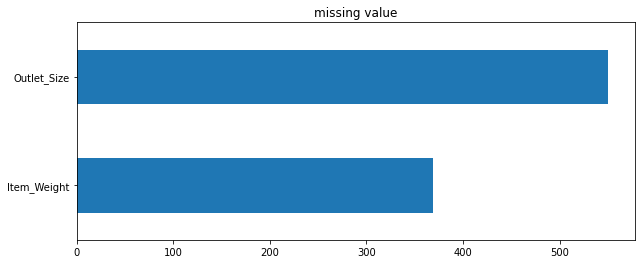

Item_Weight    369
Outlet_Size    550
dtype: int64


In [112]:
null_visual(df_3)

In [113]:
numeric_data,cat_data=cat_num(df_3)   #to check on numeric and categorical features of the dataset
cat_analysis(cat_data)              #to find the value counts of each categorical feature

there are 5 numerical and 7 categorical columns
Item_Identifier
FDT49    6
FDI22    5
NCF30    5
FDM58    5
NCM07    5
        ..
DRE48    1
FDA01    1
FDL44    1
NCJ43    1
DRE03    1
Name: Item_Identifier, Length: 1172, dtype: int64

Item_Fat_Content
Low Fat    1168
Regular     691
LF           78
low fat      34
reg          30
Name: Item_Fat_Content, dtype: int64

Item_Type
Snack Foods              284
Fruits and Vegetables    280
Household                210
Frozen Foods             183
Baking Goods             159
Dairy                    159
Canned                   152
Health and Hygiene       141
Soft Drinks              105
Meat                     104
Breads                    61
Hard Drinks               50
Others                    41
Starchy Foods             31
Breakfast                 29
Seafood                   12
Name: Item_Type, dtype: int64

Outlet_Identifier
OUT049    234
OUT018    223
OUT017    220
OUT027    220
OUT013    217
OUT046    212
OUT035    196
OUT045  

In [114]:
#two attributes have missing na, one is numeric, other one is cat
#filling na with identifier mean 

df_3=na_fill(df_3)

In [116]:
df_3['Item_Visibility'] = np.log(1+df_3['Item_Visibility'])
df_3['Item_Outlet_Sales'] = np.log(1+df_3['Item_Outlet_Sales'])

## feature engineering  & EDA

In [117]:
df_3=feature_eng(df_3)
df_3=feature_eng2(df_3)

df_3.shape   #2 new features are created

after combining similar fat content 
 Low Fat    1280
Regular     721
Name: Item_Fat_Content, dtype: int64


new variable item_cat value counts 
 FD    1421
NC     392
DR     188
Name: Item_Cat, dtype: int64


(2001, 14)

In [118]:
df_3_new=label_encod(df_3)
df_3_new.shape

(2001, 22)

In [119]:
df_3_new.head()

,Item_Weight,Item_Visibility,Item_Type,Item_MRP,Item_Outlet_Sales,Outlet_Years,Item_Fat_Content_Low Fat,Item_Fat_Content_Non-Edible,Item_Fat_Content_Regular,Outlet_Size_High,...,Outlet_Location_Type_Tier 1,Outlet_Location_Type_Tier 2,Outlet_Location_Type_Tier 3,Outlet_Type_Grocery Store,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3,Item_Cat_DR,Item_Cat_FD,Item_Cat_NC
0,19.60,0.040461,9,86.9514,7.256877,16,0,1,0,0,...,1,0,0,0,1,0,0,0,0,1
1,8.06,0.021050,2,229.1326,8.908430,28,1,0,0,0,...,0,0,1,0,0,0,1,0,1,0
2,17.35,0.027214,3,86.1856,6.556899,26,0,0,1,1,...,0,0,1,0,1,0,0,0,1,0
3,9.30,0.105964,5,182.3292,5.211829,15,1,0,0,0,...,0,0,1,1,0,0,0,0,1,0
4,6.71,0.029177,0,65.4142,7.324508,14,0,0,1,0,...,1,0,0,0,1,0,0,0,1,0


In [120]:
df_3_X=df_3_new[['Outlet_Type_Grocery Store', 'Item_MRP', 'Item_Visibility','Item_Type','Outlet_Years','Item_Weight' ]]
df_3_Y= df_3_new['Item_Outlet_Sales']

## Model retraining phase 4

In [191]:
train(model, df_3_X, df_3_Y)  #retraining

pred = model.predict(df_3_X)
    
print("Model Report")
print("MSE:",mean_squared_error(df_3_Y,pred))     

Model Report
MSE: 0.04000993334932515


In [194]:
# save the model to disk  => forth retraining

filename_4 = 'model_4.sav'
pickle.dump(model, open(filename_4, 'wb'))

In [196]:
#predicting on unforeseen

loaded_model_4 = pickle.load(open(filename_4, 'rb'))
pred = loaded_model_4.predict(df_train_X)

phase_4=mean_squared_error(df_train_Y,pred)
phase_4
#predicting by model version 4

0.30431871631398544

In [200]:
print("Prediction on unforeseen after first training : ",phase_1)
print("Prediction on unforeseen after second training : ",phase_2)
print("Prediction on unforeseen after third training : ",phase_3)
print("Prediction on unforeseen after forth training : ",phase_4)

Prediction on unforeseen after first training :  0.33001073021282434
Prediction on unforeseen after second training :  0.31603564355673247
Prediction on unforeseen after third training :  0.31032012479353444
Prediction on unforeseen after forth training :  0.30431871631398544


## Conclusion : After every model retraining, the prediction on unforeseen data file is improved 